# Universities and Colleges 

#### For this notebook, I will be looking at the locations of universities/colleges and looking at buffer zones around the school to later examine what are the most common stores located near universities.

Author: Nour Abou-Fadel

First I will import the libraries

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
import contextily as ctx

In [4]:
import matplotlib.pyplot as plt

In [5]:
import plotly.express as px

Next, I'll add my data indicating the name and location of colleges LA County

In [6]:
gdf = gpd.read_file('Colleges_and_Universities.zip')

I want to take a look at what my data looks like: 

In [7]:
gdf.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,date_updat,email,dis_status,POINT_X,POINT_Y,geometry
0,2878,211,None,Education,Colleges and Universities,None,www.csupomona.edu,California State Polytechnic University - Pomona,3801 W. Temple Ave.,None,...,http://egis3.lacounty.gov/lms/?p=3072,publish,34.049531,-117.814466,2013-06-01,None,None,6.617873e+06,1.840458e+06,POINT (-117.81447 34.04953)
1,2895,211,None,Education,Colleges and Universities,None,www.calstate.edu/executive/,"California State University, The - Office Of T...",401 Golden Shore,None,...,http://egis3.lacounty.gov/lms/?p=3084,publish,33.764616,-118.201257,2013-06-01,None,None,6.500498e+06,1.736780e+06,POINT (-118.20126 33.76462)
2,2973,211,None,Education,Colleges and Universities,None,www.calstatela.edu,California State University Los Angeles,5151 State University Dr.,None,...,http://egis3.lacounty.gov/lms/?p=3145,publish,34.062769,-118.170923,2013-06-01,None,None,6.509902e+06,1.845267e+06,POINT (-118.17092 34.06277)
3,3097,211,None,Education,Colleges and Universities,None,www.laccd.edu,Los Angeles Community College District,770 Wilshire Blvd.,None,...,http://egis3.lacounty.gov/lms/?p=3246,publish,34.049138,-118.258111,2013-06-01,None,None,6.483483e+06,1.840363e+06,POINT (-118.25811 34.04914)
4,11961,HSIP Freedom CollegesUniversities,203049,Education,Colleges and Universities,None,LA County,Hebrew Union College-Jewish Institute Of Religion,3077 University Ave,None,...,http://egis3.lacounty.gov/lms/?p=12778,publish,34.025458,-118.282567,2010-11-01,None,None,6.476050e+06,1.831765e+06,POINT (-118.28257 34.02546)


Now that I know that my rows and columns consist of, I'm going to narrow down the data. I'm mostly focus on the ID, name, location, and geometry

In [8]:
columns_to_keep= ['OBJECTID',
 'source',
 'ext_id',
 'cat1',
 'cat2',
 'cat3',
 'org_name',
 'Name',
 'addrln1', 
 'city',
 'state',
 'info1',
 'info2',
 'post_id',
 'zip',
 'latitude',
 'longitude',
 'dis_status',
 'geometry']

In [9]:
gdf= gdf[columns_to_keep]

For mapping purposes, I only need to the ID, name and geometry (latitude and longitude)

In [10]:
desired_columns=['OBJECTID','Name','addrln1','city','zip','latitude','longitude','geometry']

gdf[desired_columns]

,OBJECTID,Name,addrln1,city,zip,latitude,longitude,geometry
0,2878,California State Polytechnic University - Pomona,3801 W. Temple Ave.,Pomona,91768,34.049531,-117.814466,POINT (-117.81447 34.04953)
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,POINT (-118.20126 33.76462)
2,2973,California State University Los Angeles,5151 State University Dr.,Los Angeles,90032,34.062769,-118.170923,POINT (-118.17092 34.06277)
3,3097,Los Angeles Community College District,770 Wilshire Blvd.,Los Angeles,90017,34.049138,-118.258111,POINT (-118.25811 34.04914)
4,11961,Hebrew Union College-Jewish Institute Of Religion,3077 University Ave,Los Angeles,90007,34.025458,-118.282567,POINT (-118.28257 34.02546)
...,...,...,...,...,...,...,...,...
212,62177,Los Angeles Trade Technical College,400 W. Washington Blvd.,Los Angeles,90015,34.033227,-118.270041,POINT (-118.27004 34.03323)
213,62310,"Help Group, The",13130 Burbank Blvd,Sherman Oaks,91401,34.171910,-118.419360,POINT (-118.41936 34.17191)
214,62928,West Los Angeles College,9000 Overland Ave,Culver City,90230,34.003062,-118.386221,POINT (-118.38622 34.00306)
215,63227,Long Beach Community College District,4901 E Carson St,Long Beach,90808,33.834305,-118.135638,POINT (-118.13564 33.83430)


Saving this narrowed down list as gdf_trimmed to refer back to

In [11]:
gdf_trimmed=gdf[desired_columns].copy()
gdf_trimmed

,OBJECTID,Name,addrln1,city,zip,latitude,longitude,geometry
0,2878,California State Polytechnic University - Pomona,3801 W. Temple Ave.,Pomona,91768,34.049531,-117.814466,POINT (-117.81447 34.04953)
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,POINT (-118.20126 33.76462)
2,2973,California State University Los Angeles,5151 State University Dr.,Los Angeles,90032,34.062769,-118.170923,POINT (-118.17092 34.06277)
3,3097,Los Angeles Community College District,770 Wilshire Blvd.,Los Angeles,90017,34.049138,-118.258111,POINT (-118.25811 34.04914)
4,11961,Hebrew Union College-Jewish Institute Of Religion,3077 University Ave,Los Angeles,90007,34.025458,-118.282567,POINT (-118.28257 34.02546)
...,...,...,...,...,...,...,...,...
212,62177,Los Angeles Trade Technical College,400 W. Washington Blvd.,Los Angeles,90015,34.033227,-118.270041,POINT (-118.27004 34.03323)
213,62310,"Help Group, The",13130 Burbank Blvd,Sherman Oaks,91401,34.171910,-118.419360,POINT (-118.41936 34.17191)
214,62928,West Los Angeles College,9000 Overland Ave,Culver City,90230,34.003062,-118.386221,POINT (-118.38622 34.00306)
215,63227,Long Beach Community College District,4901 E Carson St,Long Beach,90808,33.834305,-118.135638,POINT (-118.13564 33.83430)


In [12]:
gdf.tail()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,city,state,info1,info2,post_id,zip,latitude,longitude,dis_status,geometry
212,62177,211,None,Education,Colleges and Universities,None,None,Los Angeles Trade Technical College,400 W. Washington Blvd.,Los Angeles,CA,None,None,68997,90015,34.033227,-118.270041,None,POINT (-118.27004 34.03323)
213,62310,211,None,Education,Colleges and Universities,None,None,"Help Group, The",13130 Burbank Blvd,Sherman Oaks,CA,None,None,70042,91401,34.171910,-118.419360,None,POINT (-118.41936 34.17191)
214,62928,211,None,Education,Colleges and Universities,None,None,West Los Angeles College,9000 Overland Ave,Culver City,CA,None,None,70461,90230,34.003062,-118.386221,None,POINT (-118.38622 34.00306)
215,63227,211,None,Education,Colleges and Universities,None,None,Long Beach Community College District,4901 E Carson St,Long Beach,CA,None,None,70577,90808,33.834305,-118.135638,None,POINT (-118.13564 33.83430)
216,63706,211,None,Education,Colleges and Universities,None,None,West Los Angeles College - Community Services ...,9000 Overland Ave,Culver City,CA,None,None,70797,90230,34.003062,-118.386221,None,POINT (-118.38622 34.00306)


Next, I want to see plot the Universities and Colleges through the geometry column and match it. So first, I want to take a look at my geometry column.

In [12]:
gdf_trimmed.geometry

0      POINT (-117.81447 34.04953)
1      POINT (-118.20126 33.76462)
2      POINT (-118.17092 34.06277)
3      POINT (-118.25811 34.04914)
4      POINT (-118.28257 34.02546)
                  ...             
212    POINT (-118.27004 34.03323)
213    POINT (-118.41936 34.17191)
214    POINT (-118.38622 34.00306)
215    POINT (-118.13564 33.83430)
216    POINT (-118.38622 34.00306)
Name: geometry, Length: 217, dtype: geometry

Now that I've seen my geometry column listing the latitude and longitude of a point to represent the university locations. I want to match the university name to the latitude and longitude listed. This way, I can easily find the name of the university when looking at my map.

In order to do this for all the schools, I'm going to create a loop. This loop will show the name and geometry for each of my universities. I will use the loop for all my data points (universities) in gdf_trimmed

In [13]:
for index, row in gdf_trimmed.iterrows():
    print(row.Name,row.latitude,row.longitude)

California State Polytechnic University - Pomona 34.049531 -117.814466
California State University, The - Office Of The Chancellor 33.764616 -118.201257
California State University Los Angeles 34.062769 -118.170923
Los Angeles Community College District 34.049138 -118.258111
Hebrew Union College-Jewish Institute Of Religion 34.025458 -118.282567
Itt Technical Institute-Sylmar 34.30001 -118.473909
Antioch University-Los Angeles Branch 33.98764 -118.384651
Platt College-Los Angeles 34.081813 -118.151838
Los Angeles Ort Technical Institute 34.063876 -118.369383
Everest College-West Los Angeles 34.032826 -118.389963
Thuy Princess Beauty College 34.057865 -117.748468
North-West College-Glendale 34.148546 -118.255112
Everest College-City Of Industry 34.02892 -118.02357
Fremont College 33.868223 -118.098966
Universal College Of Beauty Inc 34.004239 -118.331741
Itt Technical Institute-Torrance 33.849085 -118.290463
Los Angeles Ort Technical Institute-Sherman Oaks 34.15321 -118.462578
Hacienda 

Next, I need to match make sure that my data points have the correct projection.

In [14]:
gdf_trimmed2 = gdf_trimmed.to_crs(epsg=3857)

Now I'm going to plot the locations of the schools in LA County

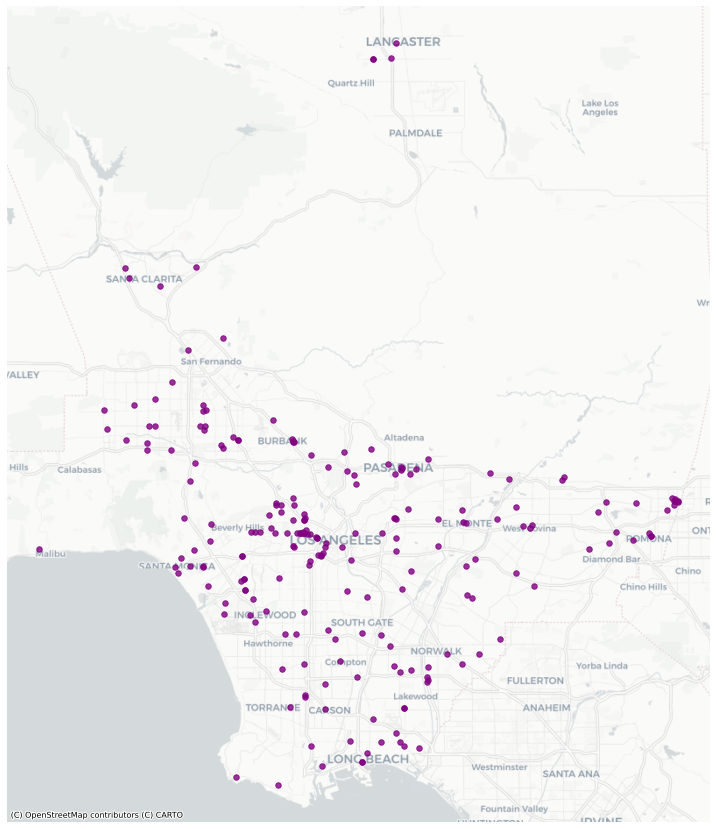

In [15]:
fig,ax = plt.subplots(figsize=(15,15))

gdf_trimmed2.plot(ax=ax,
             color='purple',
             markersize=30, alpha=.8,)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Through the loop, I can now see the locations of all the schools in LA County and if I click on one data point, I will get the name of the university.

Now that I have the location and names of the universities in LA County, I want to see what are the most common stores located around them. In order to do this, I will be using the buffer function. Once I've created a buffer around the schools - I will add the locations of different stores and narrow down the most common stores located in the buffer zone through spatial join.

In [16]:
gdf_buffer = gdf_trimmed2.copy()

In order to create a clear correlation between the universities and store locations, I need to pick a short distance. I'm going to start with 2 miles around the schools and see what I find. 2 miles is around 3000 meters. 

In [17]:
gdf_buffer['geometry']=gdf_buffer['geometry'].buffer(3218)

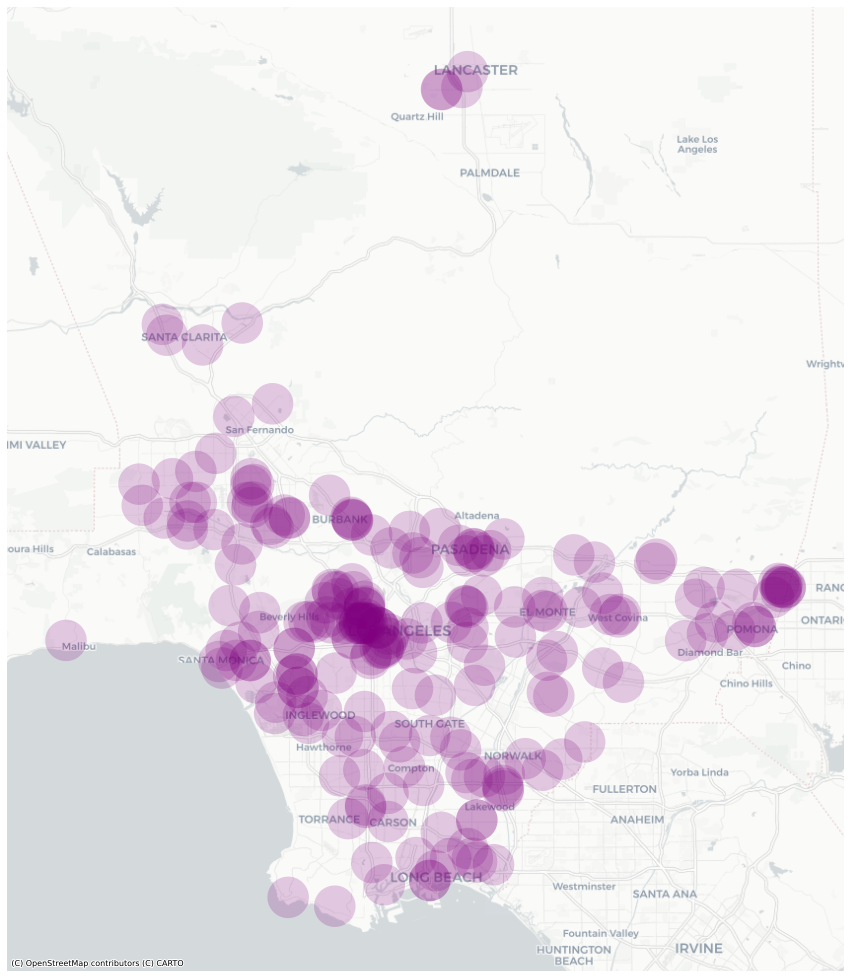

In [18]:
fig,ax = plt.subplots(figsize=(15,20))

gdf_buffer.plot(ax=ax,
             color='purple',
             markersize=.5, alpha=.2,)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

I've mapped a 3000 meter buffer zone arounf each university. I realized that this would need more refinement since the points that indicate the university location is just a center point and so the buffer is starting from there rather than starting from the outer boundary of each school. I still need to figure out how to map the out boundary of each university in order to accurately show the buffer zone outside of the school instead of outside the center point.

In [19]:
grs= gpd.read_file('GroceryStores.geojson')

In [20]:
list(grs)

['Store_Name',
 'Store_Chain',
 'Street_Number',
 'Street_Name',
 'Additional Address',
 'City',
 'Zip_Code',
 'Latitude',
 'Longitude',
 'geometry']

In [21]:
desired_columns=['Store_Name','Store_Chain','Latitude','Longitude','geometry']

grs_trimmed= grs[desired_columns]

In [22]:
grs_trimmed.shape

(1377, 5)

In [23]:
grs_trimmed.head(20)

,Store_Name,Store_Chain,Latitude,Longitude,geometry
0,99 Ranch Market 38,99 Ranch Market,34.09719,-118.1227,POINT (-13149358.815 4041859.746)
1,99 RANCH MARKET 17,99 Ranch Market,33.87005,-118.0824,POINT (-13144872.640 4011366.235)
2,99 Ranch Market 18,99 Ranch Market,33.99284,-117.9318,POINT (-13128107.924 4027840.654)
3,99 RANCH MARKET 7,99 Ranch Market,34.12338,-118.0597,POINT (-13142345.687 4045381.002)
4,99 Ranch Market 3,99 Ranch Market,33.99646,-117.8884,POINT (-13123276.658 4028326.701)
5,99 Ranch Market 13,99 Ranch Market,34.18811,-118.4661,POINT (-13187585.928 4054088.658)
6,99 RANCH MARKET 6,99 Ranch Market,33.87275,-118.2966,POINT (-13168717.275 4011728.231)
7,99 Ranch Market 12,99 Ranch Market,34.06256,-118.1334,POINT (-13150549.934 4037205.402)
8,99 Ranch Market 208,99 Ranch Market,34.07961,-118.1015,POINT (-13146998.842 4039496.720)
9,99 Ranch Market 11,99 Ranch Market,34.06261,-118.0907,POINT (-13145796.591 4037212.121)


In [24]:
grs_s = grs_trimmed.to_crs(epsg=3857)

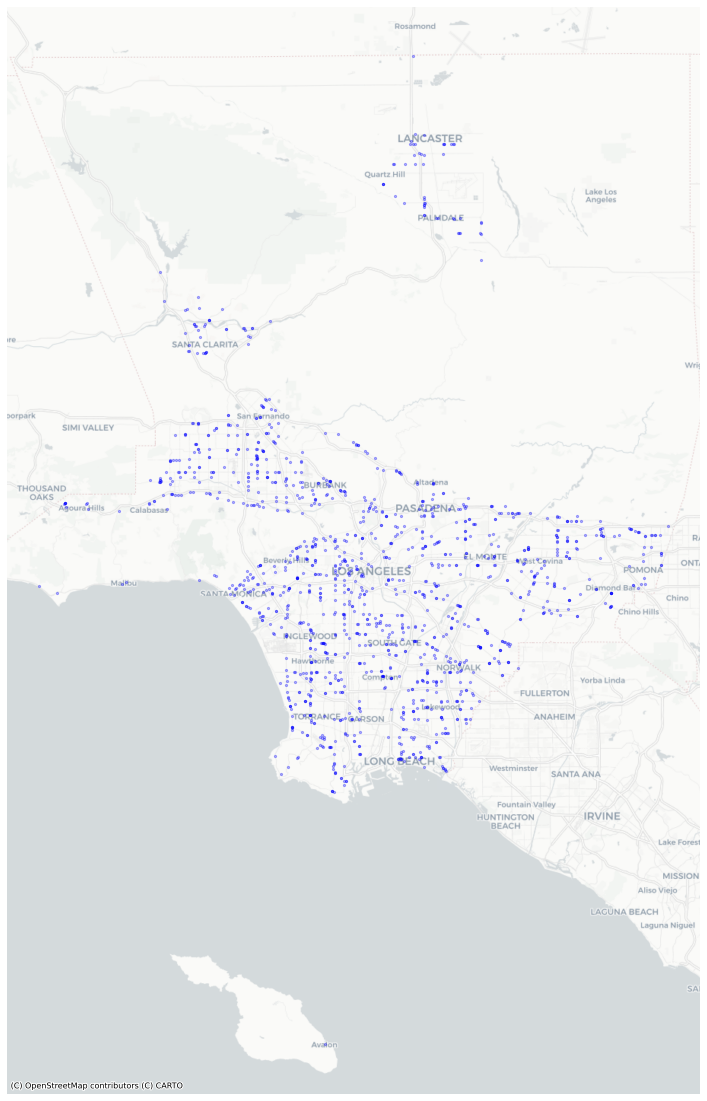

In [25]:
fig, ax = plt.subplots(figsize=(15,20))

grs_s.plot(ax=ax,
         color='blue', 
         markersize=5,
         alpha=0.3)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [26]:
minx, miny, maxx, maxy = gdf_buffer.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13217696.140804501
-13099747.188059123
3990006.762918487
4125815.1935587507


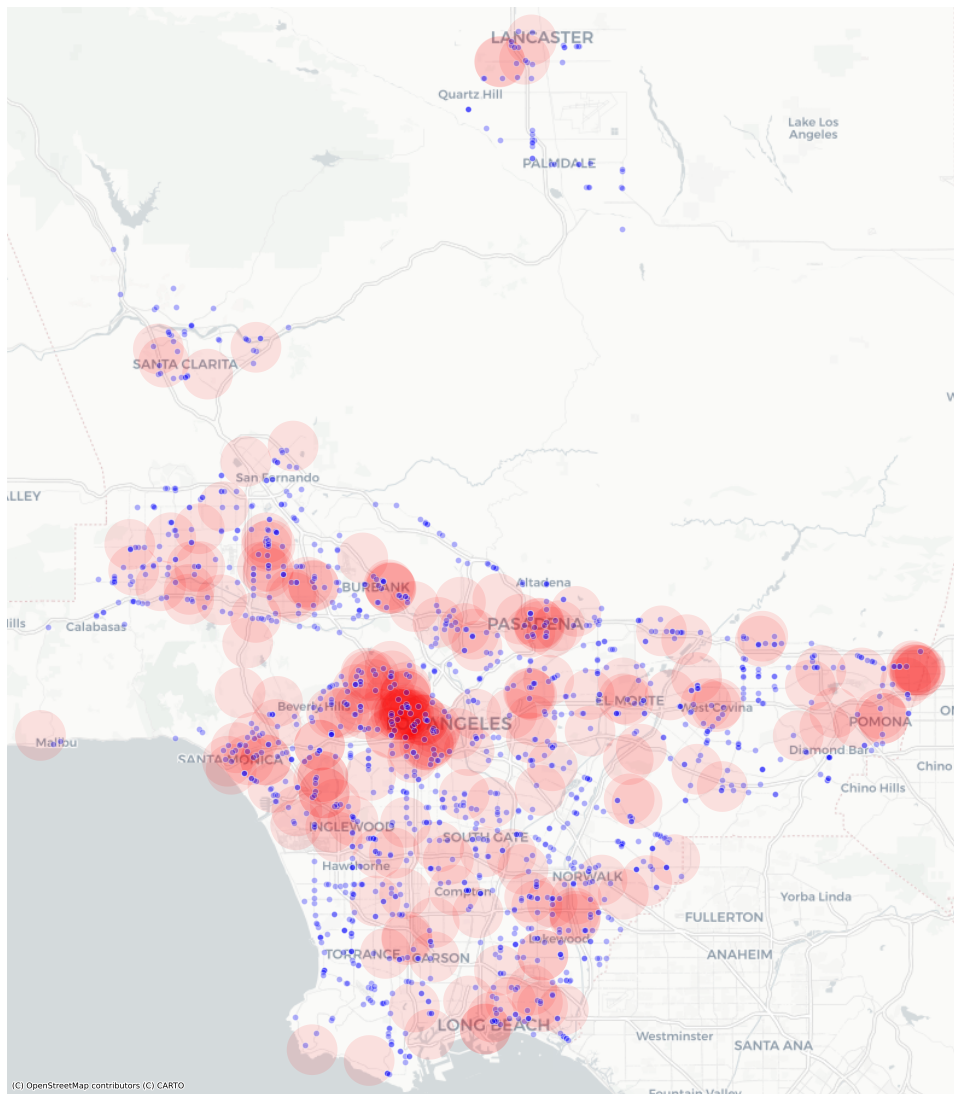

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))

gdf_buffer.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=10,
            alpha=0.1)


grs_s.plot(ax=ax, 
        color='blue', 
        edgecolor='white',
        alpha=0.3)

ax.set_xlim(minx - 1000, maxx + 1000) 
ax.set_ylim(miny - 1000, maxy + 1000)


ax.axis('off')


ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [28]:
## this visually shows all the stores that fall within that buffer zone. Now I want to do a spatial join to find out which store is the most common

In [29]:
join = gpd.sjoin( gdf_buffer,grs_s, how='left')
join.head(20)

,OBJECTID,Name,addrln1,city,zip,latitude,longitude,geometry,index_right,Store_Name,Store_Chain,Latitude,Longitude
0,2878,California State Polytechnic University - Pomona,3801 W. Temple Ave.,Pomona,91768,34.049531,-117.814466,"POLYGON ((-13111828.370 4035454.765, -13111843...",NaN,NaN,NaN,NaN,NaN
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",1195.0,VONS 2861,Vons,33.76927,-118.1846
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",1083.0,TOP VALU 9,Top_valu,33.77201,-118.1938
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",554.0,Numero Uno Market - Long Beach 124,Numero_uno,33.77202,-118.1938
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",325.0,Fresh & Easy 1417,Fresh&Easy,33.77216,-118.1905
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",51.0,ALBERTSONS 6163,Albertsons,33.77234,-118.1893
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",222.0,El Super 49,El_Super,33.77234,-118.1893
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",1305.0,Walmart Store 2949,Walmart,33.77285,-118.191
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",984.0,Superior Grocers 117,Superior_grocers,33.77973,-118.1895
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",476.0,Mother's Nutritional Center 417,Mother_Nutrition,33.78296,-118.1896


In [30]:
stores_by_gdf = join.Name.value_counts().rename_axis('Name').reset_index(name='store_count')
stores_by_gdf.head(20)

,Name,store_count
0,Marinello School Of Beauty,104
1,Marinello Schools Of Beauty,46
2,Kaplan College,37
3,Intercoast Colleges,35
4,Universal College Of Beauty Inc,31
5,Liberty Training Institute,29
6,Brooks College,29
7,Westwood College-Los Angeles,27
8,Marian Health Careers Center,27
9,La College International,26


In [50]:
store_by_school=join.groupby(['Name','Store_Chain'])['OBJECTID'].agg('count').reset_index()
store_by_school.head(50)

,Name,Store_Chain,OBJECTID
0,Abram Friedman Occupational Center,Food_4_Less,2
1,Abram Friedman Occupational Center,Fresh&Easy,2
2,Abram Friedman Occupational Center,Jons,2
3,Abram Friedman Occupational Center,Mother_Nutrition,4
4,Abram Friedman Occupational Center,Northgate,1
5,Abram Friedman Occupational Center,Numero_uno,3
6,Abram Friedman Occupational Center,Ralphs,2
7,Abram Friedman Occupational Center,Sav_on_drug,1
8,Abram Friedman Occupational Center,Smart&final,3
9,Abram Friedman Occupational Center,Superior_grocers,2


<AxesSubplot:xlabel='Name'>

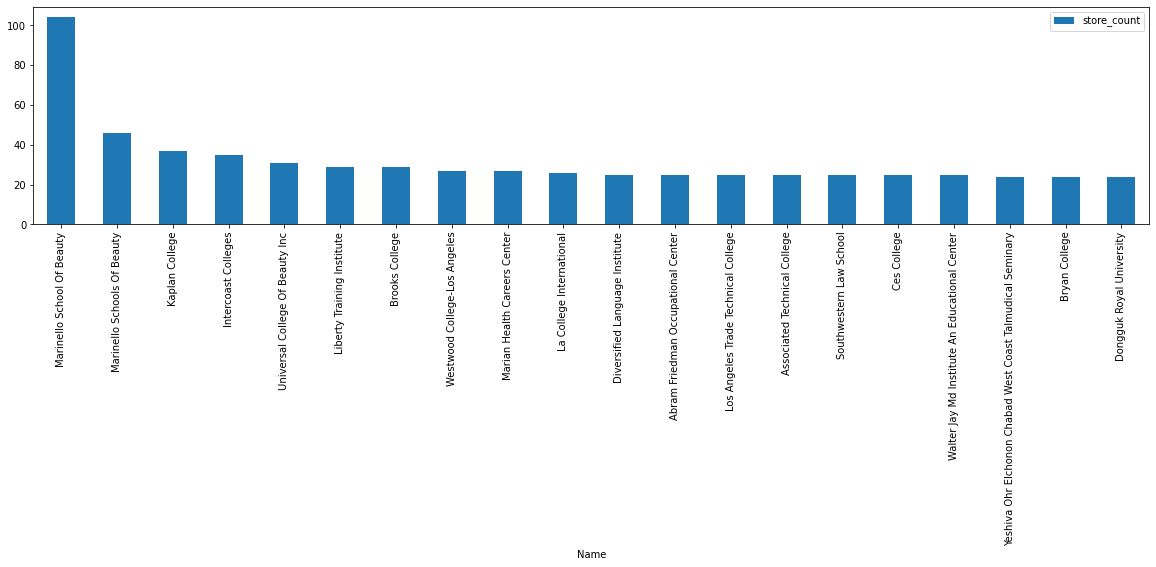

In [32]:
stores_by_gdf[:20].plot.bar(figsize=(20,4),
                             x='Name',
                             y='store_count')

In [33]:
store_school=gdf_buffer.merge(stores_by_gdf,on='Name')
store_school.head(10)

,OBJECTID,Name,addrln1,city,zip,latitude,longitude,geometry,store_count
0,2878,California State Polytechnic University - Pomona,3801 W. Temple Ave.,Pomona,91768,34.049531,-117.814466,"POLYGON ((-13111828.370 4035454.765, -13111843...",1
1,2895,"California State University, The - Office Of T...",401 Golden Shore,Long Beach,90802,33.764616,-118.201257,"POLYGON ((-13154885.747 3997239.323, -13154901...",10
2,2973,California State University Los Angeles,5151 State University Dr.,Los Angeles,90032,34.062769,-118.170923,"POLYGON ((-13151508.981 4037233.482, -13151524...",2
3,3097,Los Angeles Community College District,770 Wilshire Blvd.,Los Angeles,90017,34.049138,-118.258111,"POLYGON ((-13161214.705 4035401.964, -13161230...",16
4,11961,Hebrew Union College-Jewish Institute Of Religion,3077 University Ave,Los Angeles,90007,34.025458,-118.282567,"POLYGON ((-13163937.134 4032220.922, -13163952...",19
5,11962,Itt Technical Institute-Sylmar,12669 Encinitas Ave,Sylmar,91342,34.300010,-118.473909,"POLYGON ((-13185237.228 4069157.526, -13185252...",1
6,11963,Antioch University-Los Angeles Branch,400 Corporate Pointe,Culver City,90230,33.987640,-118.384651,"POLYGON ((-13175301.073 4027142.496, -13175316...",10
7,11964,Platt College-Los Angeles,"1000 South Fremont Avenue, A9W",Alhambra,91803,34.081813,-118.151838,"POLYGON ((-13149384.449 4039792.806, -13149399...",11
8,11965,Los Angeles Ort Technical Institute,6435 Wilshire Blvd,Los Angeles,90048,34.063876,-118.369383,"POLYGON ((-13173601.447 4037382.236, -13173616...",20
9,11966,Everest College-West Los Angeles,3000 S Robertson Blvd #300,Los Angeles,90034,34.032826,-118.389963,"POLYGON ((-13175892.402 4033210.604, -13175907...",14


<AxesSubplot:>

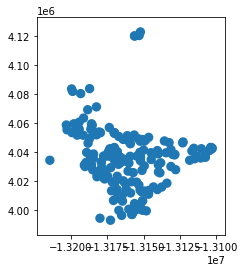

In [34]:
store_school.plot() 

In [35]:
ss_buffer = store_school.to_crs(epsg=3857)

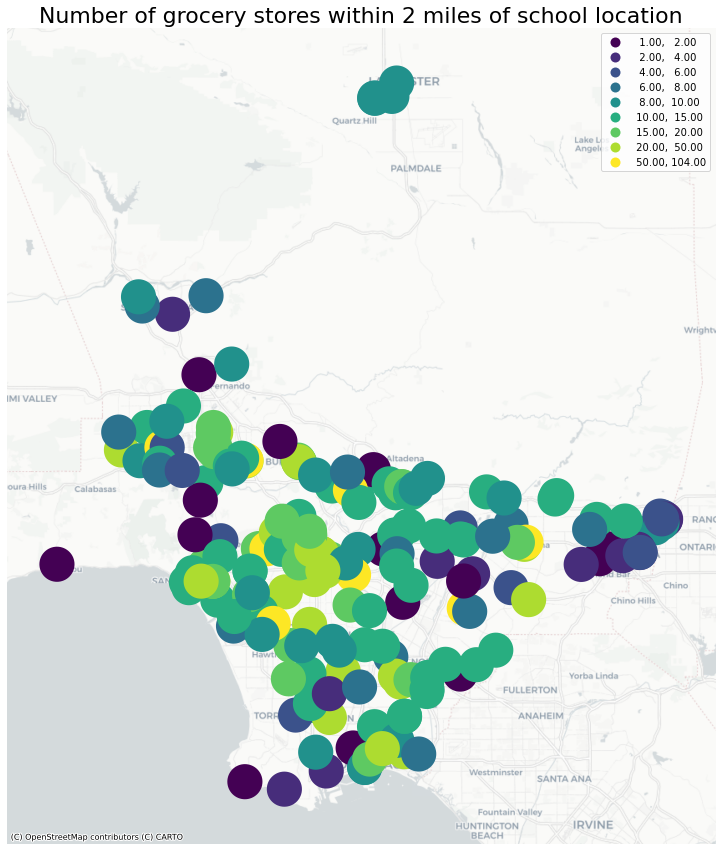

In [36]:
fig,ax = plt.subplots(figsize=(15,15))

ss_buffer.plot(ax=ax,
        column='store_count',
        legend=True,
        alpha=1,
        markersize=.1,
        cmap='viridis',
        scheme='user_defined',
        classification_kwds={'bins':[2,4,6,8,10,15,20,50]})

ax.axis('off')
ax.set_title('Number of grocery stores within 2 miles of school location',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)